### Inicialização dos dados

In [ ]:
import numpy as np
import pandas as pd

predicted = np.load('features/predicted.npy')

df = pd.read_parquet('examples/tce.parquet')

split_idx = int(0.90 * len(df))
df = df[:split_idx]

assert len(df) == len(predicted)

df['cluster'] = predicted

### Quantos clusters nós temos?

In [86]:
import numpy as np

# How many clusters?
print(np.sort(np.unique(predicted)))

[ 0  1  2  3  4  5  7  9 10 11 12 13 14 15 16 17 18 21 25 29 34 36 38 39
 43 46 49]


cluster
2     371389
25    141733
15     99694
38     80884
3      71480
10     69115
13     67155
7      62511
29     57283
5      52895
36     51910
21     46266
17     44706
34     44046
0      28527
39     18448
46     12178
12      8126
4       4311
43      1058
1        940
16       511
14       510
11       484
18       184
49        81
9          1
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


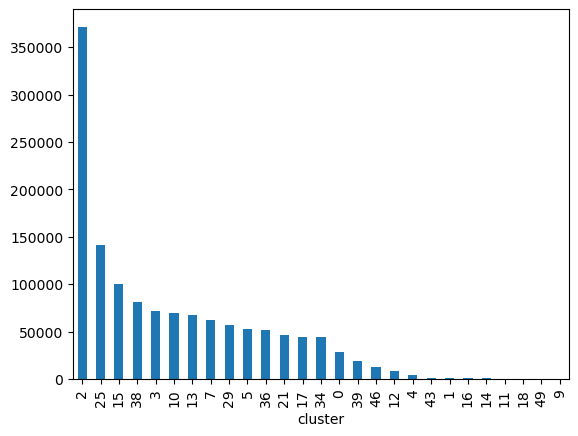

In [93]:
most_frequent_clusters = df['cluster'].value_counts()

print(most_frequent_clusters) # Cluster '9' has just 1 item
print(most_frequent_clusters.plot(kind='bar'))



### Unidades entre os clusters

<Axes: xlabel='Unidade,cluster'>

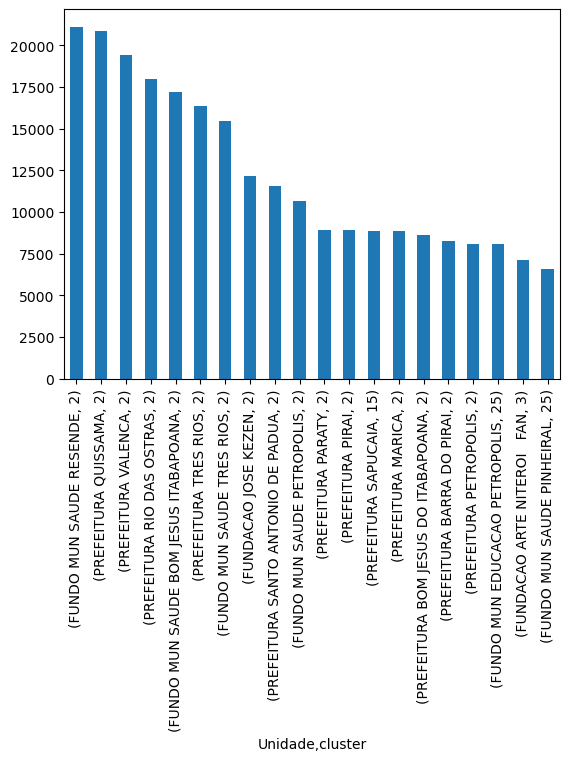

In [4]:
unidades = df[['Unidade', 'cluster']]

unidades_counts  = unidades.value_counts()

# top 20 unidades
top_20_unid = unidades_counts.iloc[:20]

top_20_unid.plot(kind='bar')


### ElemDespesaTCE entre os clusters

<Axes: xlabel='ElemDespesaTCE,cluster'>

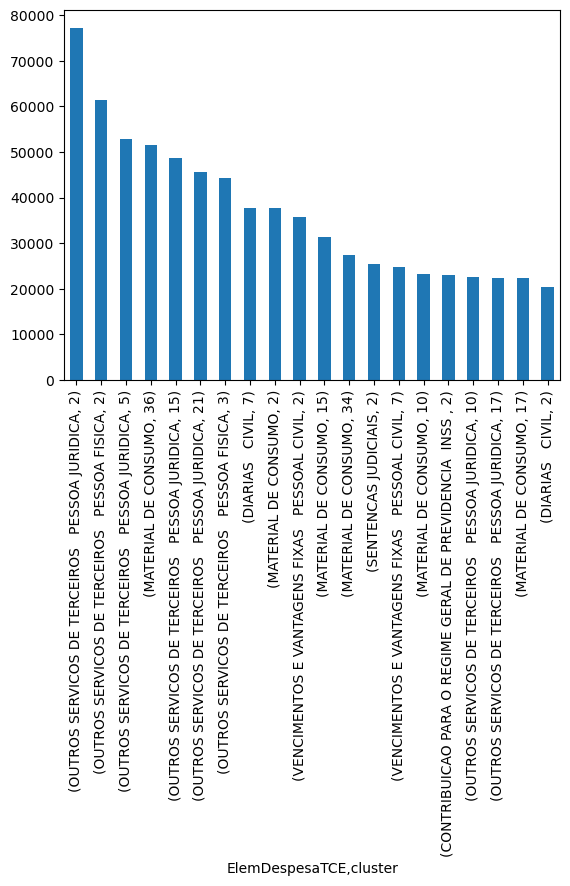

In [70]:
ElemDespesaTCE = df[['ElemDespesaTCE', 'cluster']]

counts  = ElemDespesaTCE.value_counts()

top_20 = counts.iloc[:20]

top_20.plot(kind='bar')


### Credor entre os clusters

<Axes: xlabel='Credor,cluster'>

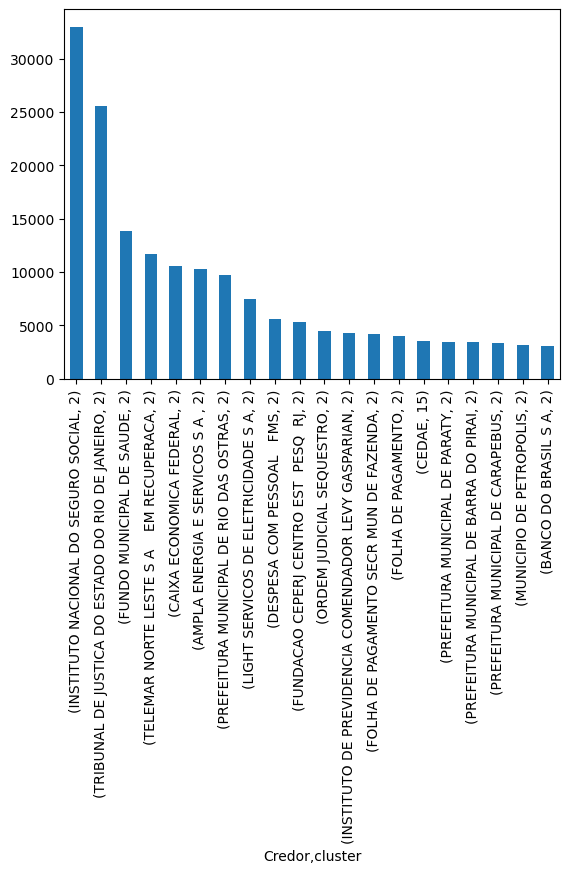

In [71]:
credor = df[['Credor', 'cluster']]

counts  = credor.value_counts()

top_20 = counts.iloc[:20]

top_20.plot(kind='bar')


### Valor Empenhado entre os clusters

In [ ]:
condition = df['Vlr_Empenhado'] < 0 # retirar do dataset os Vlr_Empenhados negativos, pois eles representam correções de empenhos antigos
data = df.drop(df[condition].index)

valor_empenhado = data[['Vlr_Empenhado','cluster']]

grupo_mean = valor_empenhado.groupby('cluster')['Vlr_Empenhado'].mean()
grupo_std = valor_empenhado.groupby('cluster')['Vlr_Empenhado'].std().fillna(0)

Text(0, 0.5, 'Vlr_Empenhado')

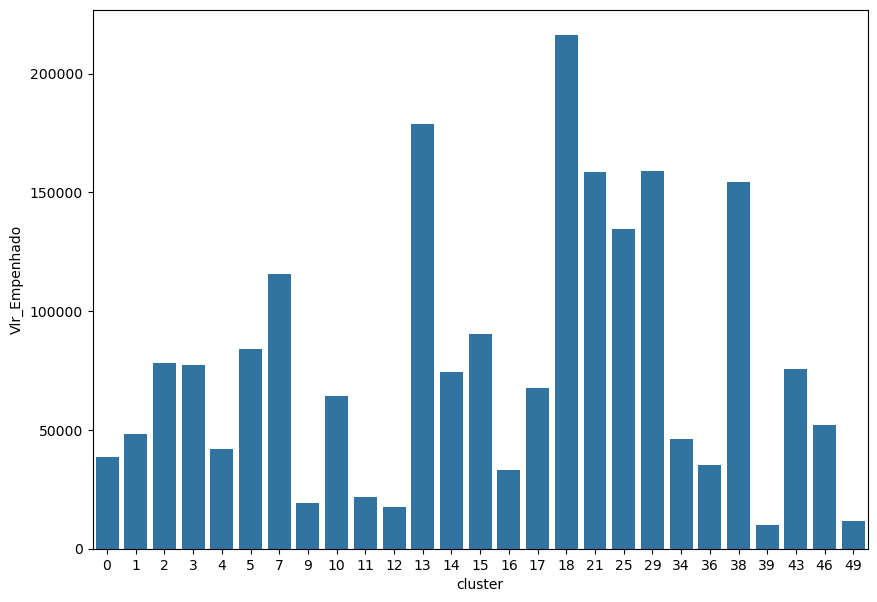

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
sns.barplot(x=grupo_mean.index,y=grupo_mean.values)
plt.ylabel('Vlr_Empenhado')

Text(0, 0.5, 'Std de Vlr_Empenhado (logscale)')

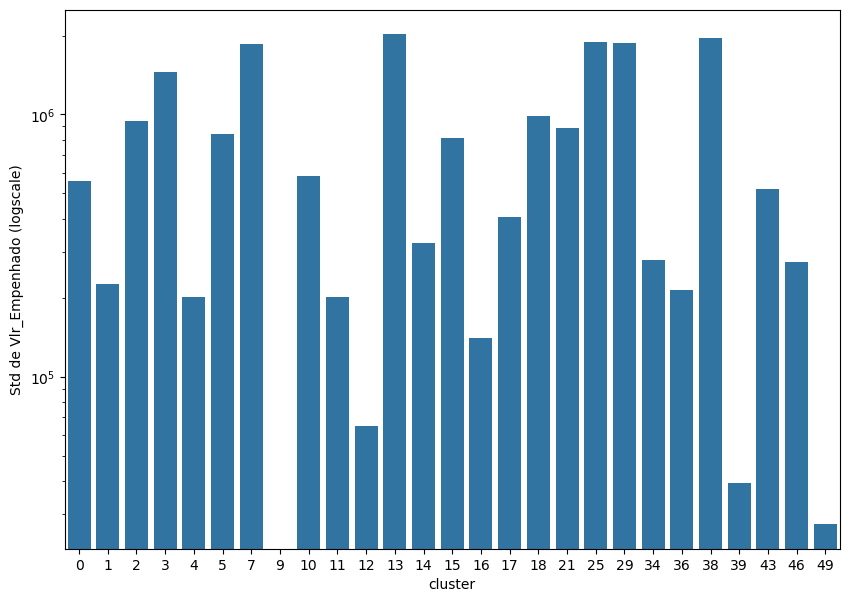

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.barplot(x=grupo_std.index, y=grupo_std.values)
plt.yscale('log')
plt.ylabel('Std de Vlr_Empenhado (logscale)')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


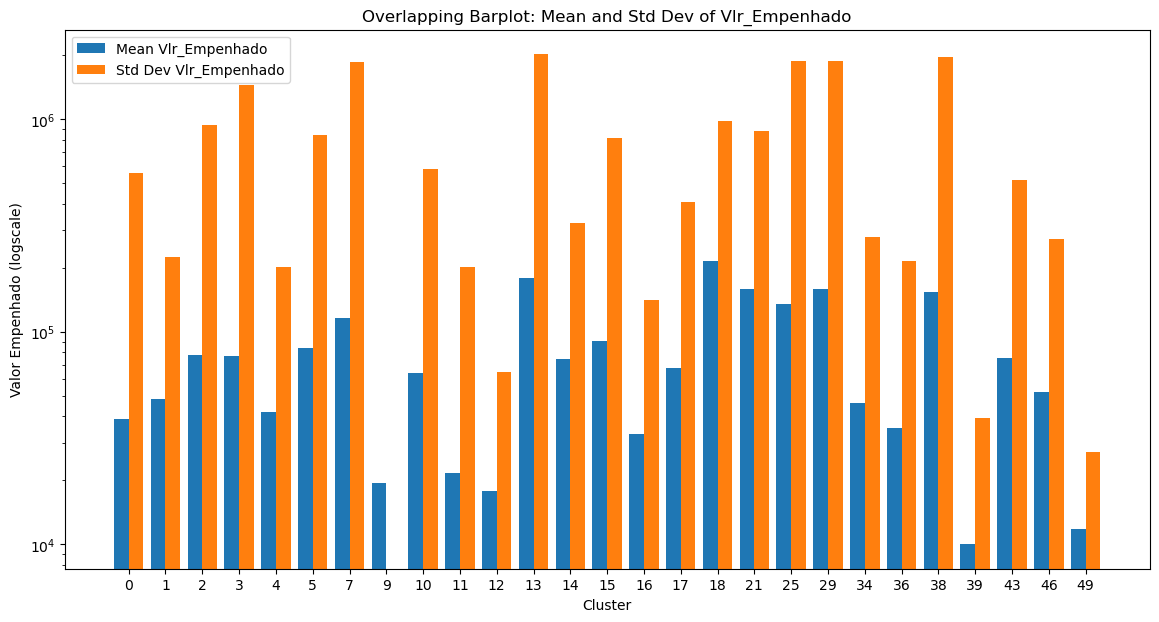

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your real data)
clusters = grupo_std.index  # assuming same indices
index = np.arange(0,len(clusters))

mean_vals = grupo_mean.values
std_vals = grupo_std.values



plt.figure(figsize=(14,7))

# Plot mean bars
plt.bar(index-0.2, mean_vals, width=0.4, label='Mean Vlr_Empenhado')

# Plot std deviation bars
plt.bar(index+0.2, std_vals, width=0.4, log=True, label='Std Dev Vlr_Empenhado')

plt.xlabel('Cluster')
plt.ylabel('Valor Empenhado (logscale)')
plt.title('Overlapping Barplot: Mean and Std Dev of Vlr_Empenhado')
plt.xticks(index, grupo_mean.index)  # ensure correct tick labels

plt.legend()
plt.show()


### Avaliação Temporal
Analise se os clusters têm padrões temporais (mês, trimestre, ano).

Exemplo: Um cluster pode estar associado a empenhos concentrados no fim de mandato.

In [ ]:
df['month'] = df['DtEmpenho'].str[5:7]

mes_cluster = df[['month', 'cluster']]

contingency = pd.crosstab(mes_cluster['cluster'], mes_cluster['month'])
contingency

month,01,02,03,04,05,06,07,08,09,10,11,12
cluster,,,,,,,,,,,,
0,4478,2704,2459,2167,2339,2183,2434,2208,1702,1936,1764,2153
1,78,102,69,69,75,69,95,104,83,77,38,81
2,46812,32169,32638,30568,31581,30342,33652,30657,24926,24027,23425,30592
3,11313,5962,6143,5722,5984,5460,6143,5889,3678,4880,4302,6004
4,501,382,335,324,375,375,439,463,311,357,216,233
5,10431,4898,4734,3820,4134,3822,4127,4200,3045,2927,2895,3862
7,7232,5187,6000,5024,5451,5405,5549,5555,4126,4470,4031,4481
9,1,0,0,0,0,0,0,0,0,0,0,0
10,9244,6662,6489,5492,5862,5462,6071,5917,4547,4721,4062,4586


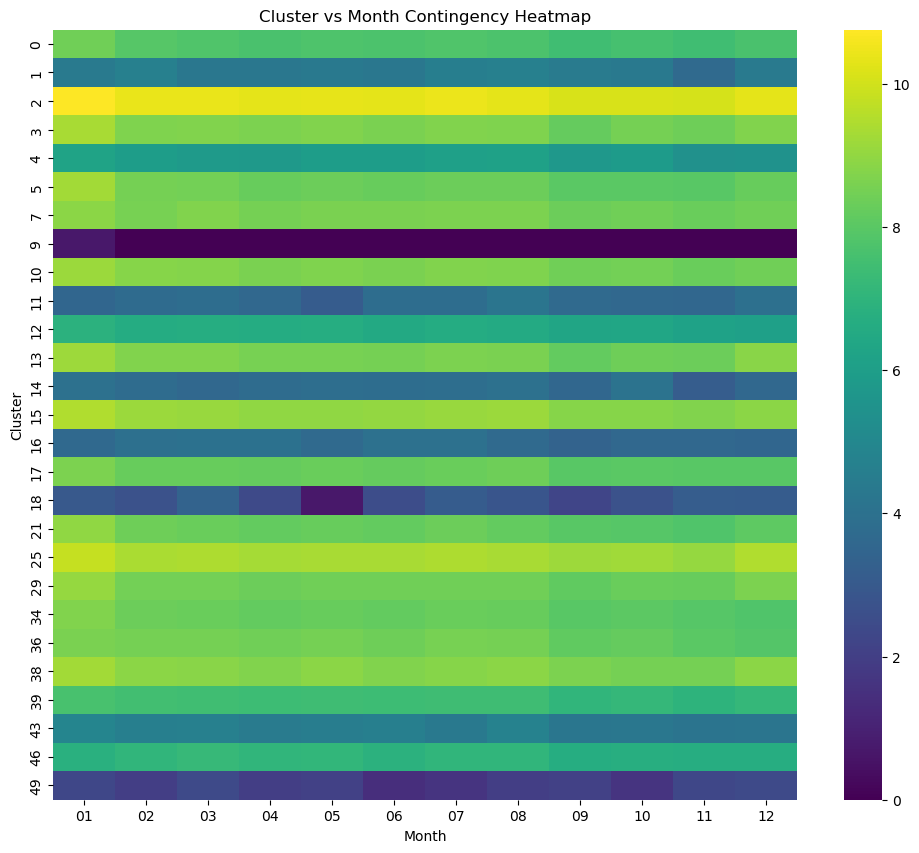

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

log_data = np.log1p(contingency)  # log1p = log(x + 1)

# aplicamos uma logscale para visualizar melhor, pois o cluster 2 é muito frequente
sns.heatmap(log_data, cmap='viridis', annot=False, fmt='d')

plt.xlabel('Month')
plt.ylabel('Cluster')
plt.title('Cluster vs Month Contingency Heatmap')
plt.show()

# O que deveríamos ver?

# Um mapa com listras uniformes, dentro da hipótese onde a variável 'mês' não inferfere nas aquisições do governo.

# Se houver meses onde tiveram mais compras, dentro desse cluster, pode ser um padrão específico!

### Caracterização Semântica dos Grupos

In [89]:
historico = df[['Historico', 'cluster']]

historico

,Historico,cluster
0,PRESTACAO DE SERVICOS FINANCEIROS PARA ARRECAD...,15
1,CHAMAMENTO PUBLICO 01 2020 SFI PROC 2019021...,15
2,MM NO 050 2018 SFI REFERENTE A PAGAMENTO DE ...,15
3,MM 059 2019 SFI COBRANCA DE TARIFAS BANCARIA...,15
4,MM 056 2019 SFI COBRANCA DE TARIFAS BANCARIA...,15
...,...,...
1336421,REFERENTE AO PAGAMENTO DOS MESES DE MAIO E JUN...,3
1336422,PAGAMENTO DE ALUGUEL MENSAL ONDE SE ENCONTRA I...,3
1336423,PAGAMENTO DE ALUGUEL MENSAL ONDE SE ENCONTRA I...,3
1336424,REFERENTE LOCACAO DE IMOVEL SITO A RUA DR SOR...,3


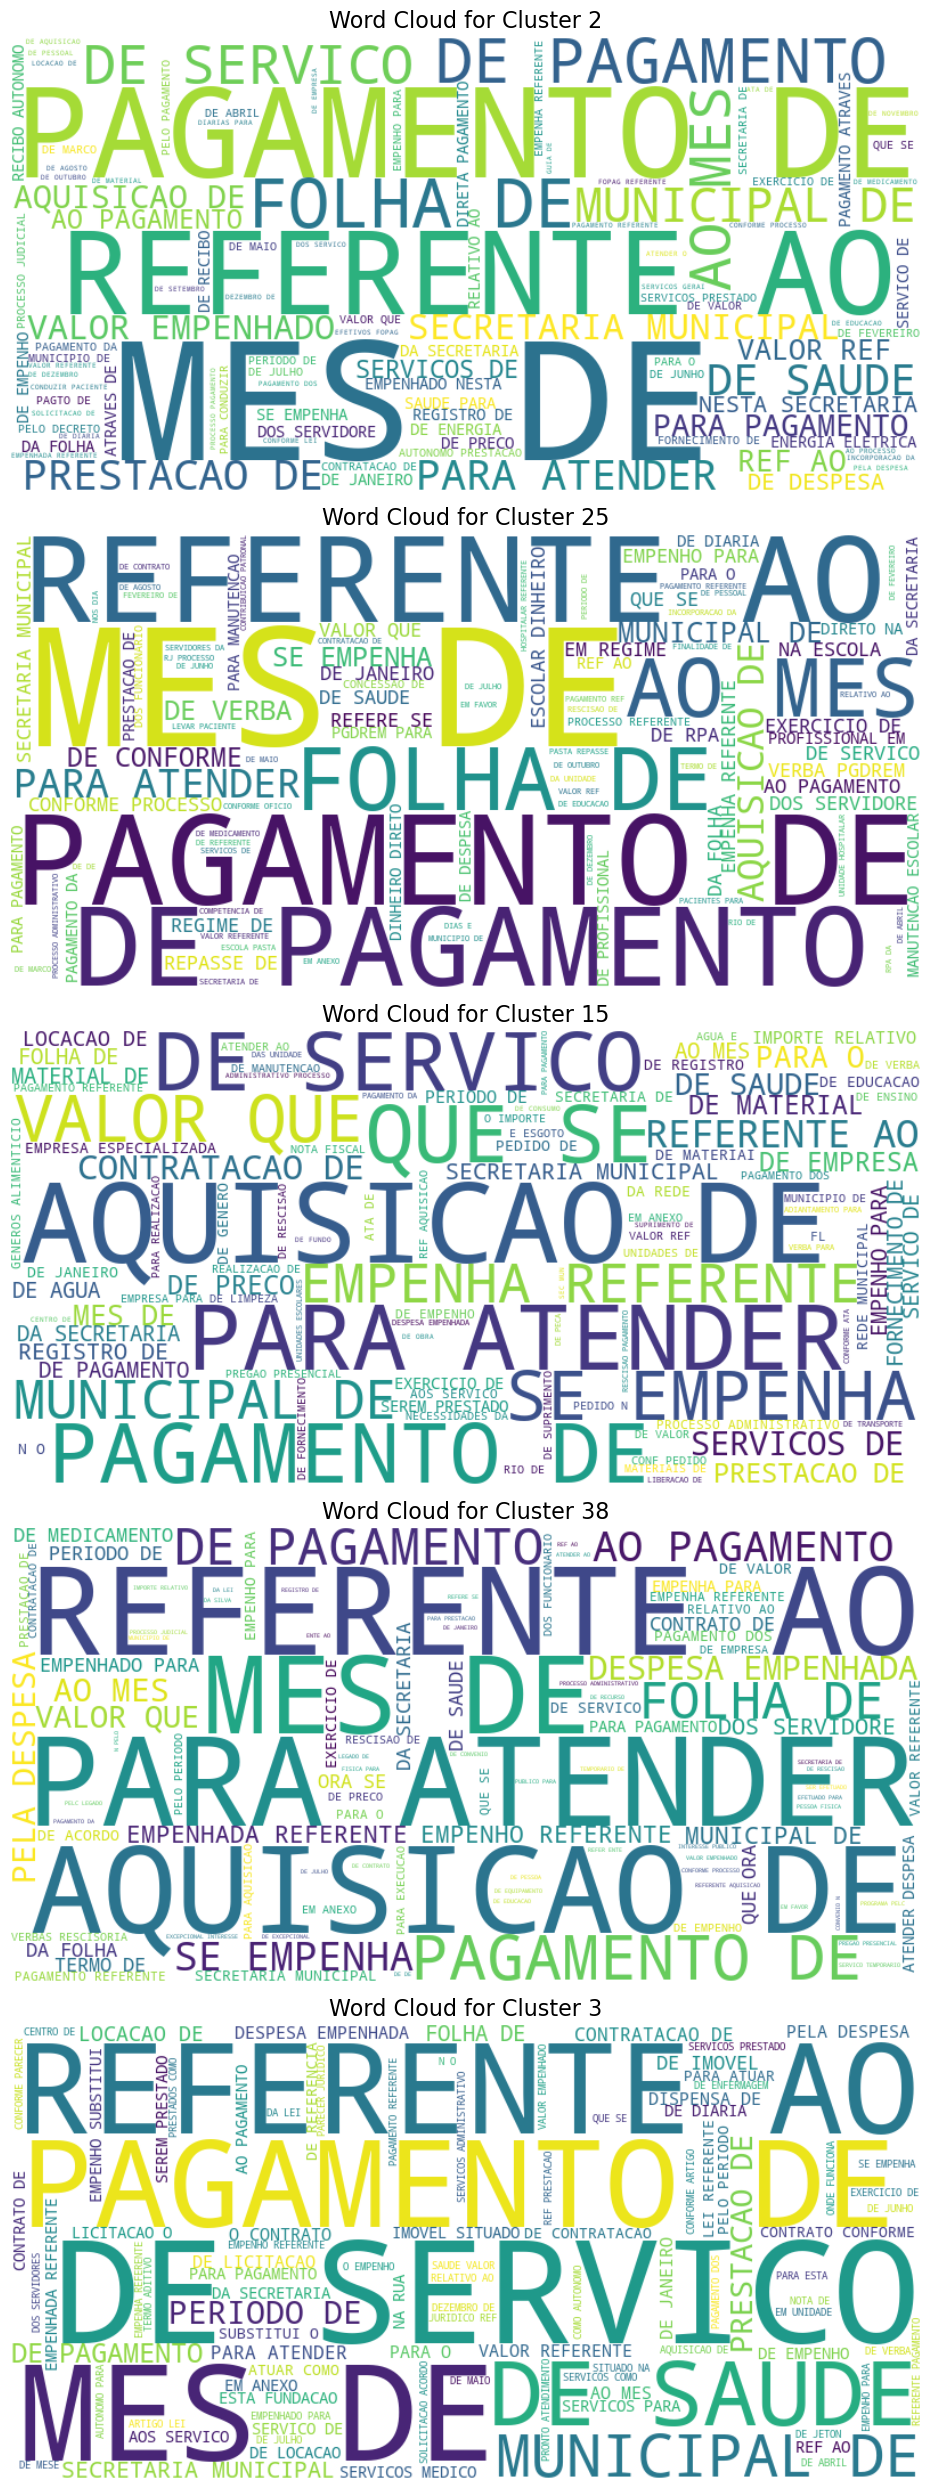

In [100]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming most_frequent_clusters is already computed
top_clusters = most_frequent_clusters.index[:5]

# Optional: define custom stopwords
stopwords = set(STOPWORDS)
# Add any domain-specific stopwords if necessary
# stopwords.update(['MM', 'SFI', 'PROC'])

# Set up plot size
plt.figure(figsize=(15, 5 * len(top_clusters)))

for i, cluster in enumerate(top_clusters, 1):
    # Filter historico texts for current cluster
    text = " ".join(historico[historico['cluster'] == cluster]['Historico'].astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        stopwords=stopwords,     # Optional stopwords removal
        max_words=100            # Optional: limit number of words
    ).generate(text)
    
    # Plot
    plt.subplot(len(top_clusters), 1, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}', fontsize=16)

plt.tight_layout()
plt.show()
